## Data Analysis Project

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import warnings 
warnings.filterwarnings('ignore')

##### Data collection

In [5]:
car=pd.read_csv("austo_automobile.csv")

In [6]:
car.head() # To show top 5 records

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [7]:
car.tail() # To show last 5 records

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


##### Data Profiling and Study

In [9]:
car.columns # To list all the columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [10]:
car.info() # To show basic information about data set: size, null, datatype etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [11]:
car.isnull().sum()  # To check missing values in dataset

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [12]:
car.duplicated().sum()  # To check duplicacy in the dataset

0

In [13]:
car.Gender.unique() # To check all unique value column

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [14]:
car.Profession.unique()

array(['Business', 'Salaried'], dtype=object)

In [15]:
car.Make.unique()

array(['SUV', 'Sedan', 'Hatchback'], dtype=object)

In [16]:
car.Marital_status.unique()

array(['Married', 'Single'], dtype=object)

In [17]:
car.Education.unique()

array(['Post Graduate', 'Graduate'], dtype=object)

In [18]:
car.Partner_working.unique()

array(['Yes', 'No'], dtype=object)

In [19]:
car.House_loan.unique()

array(['No', 'Yes'], dtype=object)

In [20]:
car.Price.unique()

array([61000, 57000, 51000, 68000, 67000, 63000, 62000, 50000, 66000,
       52000, 60000, 64000, 58000, 54000, 53000, 55000, 59000, 56000,
       69000, 49000, 70000, 65000, 43000, 47000, 37000, 35000, 42000,
       33000, 34000, 40000, 36000, 41000, 48000, 44000, 31000, 32000,
       39000, 45000, 46000, 38000, 30000, 25000, 22000, 28000, 29000,
       23000, 21000, 20000, 24000, 19000, 18000, 26000, 27000],
      dtype=int64)

##### Data cleaning

In [22]:
# Gender column has some spelling mistake we need to correct it

In [23]:
car.Gender=car.Gender.replace(['Femal','Femle'],['Female','Female'])
# Replace wrong words with correct Female spelling

In [24]:
car.Gender.unique() # To check the gender column again to confirm

array(['Male', 'Female', nan], dtype=object)

In [25]:
# Gender column has some null values we need to handle it
car.Gender.value_counts() # To check the count of the male female

Gender
Male      1199
Female     329
Name: count, dtype: int64

In [26]:
car.Gender=car.Gender.fillna("Male")
# We can fill the 53 null values with male category because male 
# is the most frequent category within the columns

In [27]:
car.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [28]:
car.dropna(axis=0) # To drop null values

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,22,Male,Salaried,Married,Graduate,3,Yes,Yes,No,34700,0.0,34700,20000,Sedan
1575,22,Male,Salaried,Married,Graduate,3,Yes,No,No,34000,0.0,34000,19000,Hatchback
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback


In [29]:
new = car.dropna(axis=0) 

In [30]:
new.shape

(1475, 14)

In [31]:
(new.Salary+new.Partner_salary==new.Total_salary).unique()

array([ True])

In [32]:
car.Partner_salary=car.Total_salary-car.Salary # To fill all parnter salary null values

In [35]:
car.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

##### Data profiling with visualization

In [59]:
gender_counts=pd.DataFrame(car.Gender.value_counts()).rename(columns={"count":"Gender"}) # Count gender for visualization
# To convert in data frame because bar plot need 2D data

<Axes: xlabel='Gender'>

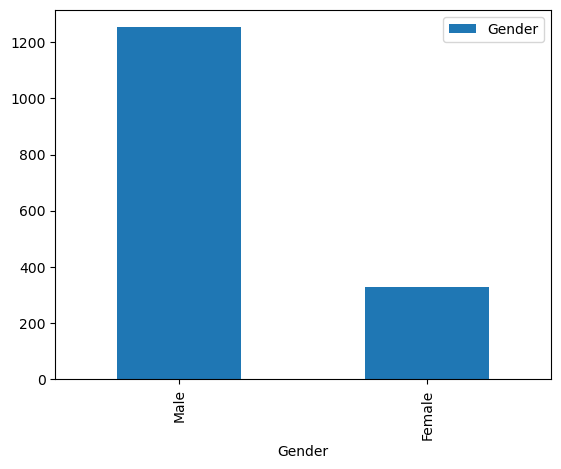

In [66]:
gender_counts.plot.bar() # To create bar graph using gender_counts

In [67]:
profession_count=pd.DataFrame(car.Profession.value_counts()).rename(columns={"count":"Profession"})

<Axes: xlabel='Profession'>

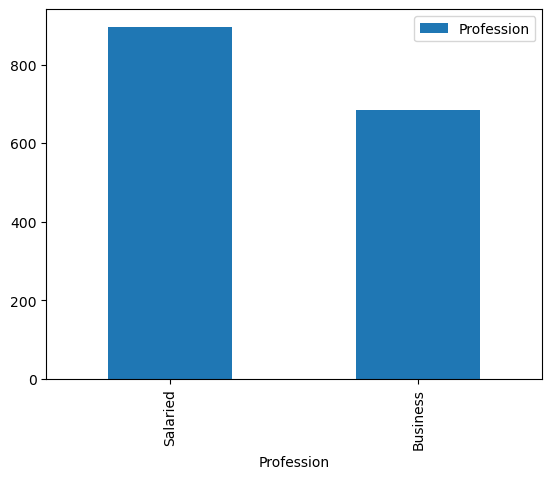

In [70]:
profession_count.plot.bar()

In [72]:
dependent_count=pd.DataFrame(car.No_of_Dependents.value_counts()).rename(columns={"count":"No_of_Dependents"})

<Axes: xlabel='No_of_Dependents'>

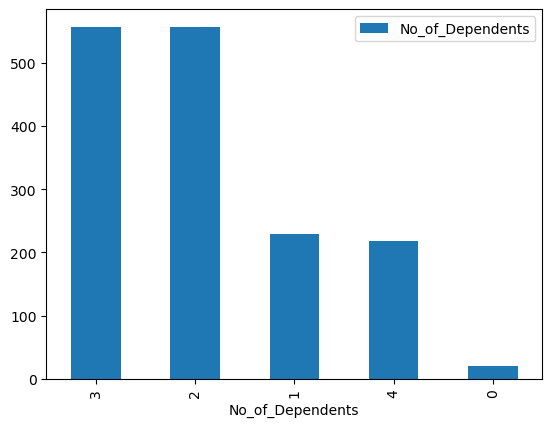

In [74]:
dependent_count.plot.bar()

In [76]:
marital_count=pd.DataFrame(car.Marital_status.value_counts()).rename(columns={"count":"Marital_status"})

<Axes: xlabel='Marital_status'>

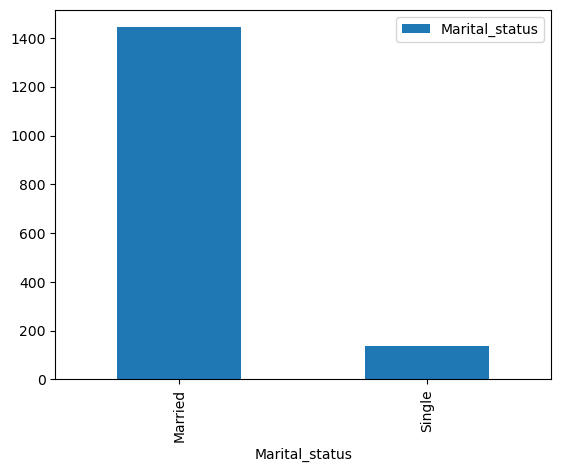

In [78]:
marital_count.plot.bar()

In [80]:
make_count=pd.DataFrame(car.Make.value_counts()).rename(columns={"count":"Make"})

<Axes: xlabel='Make'>

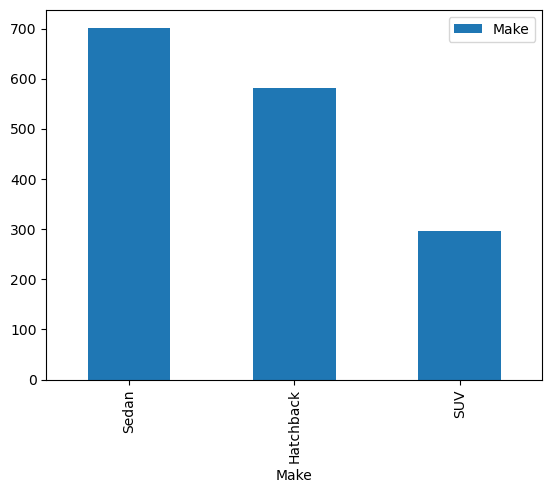

In [82]:
make_count.plot.bar()

In [84]:
education_count=pd.DataFrame(car.Education.value_counts()).rename(columns={"count":"Education"})

<Axes: xlabel='Education'>

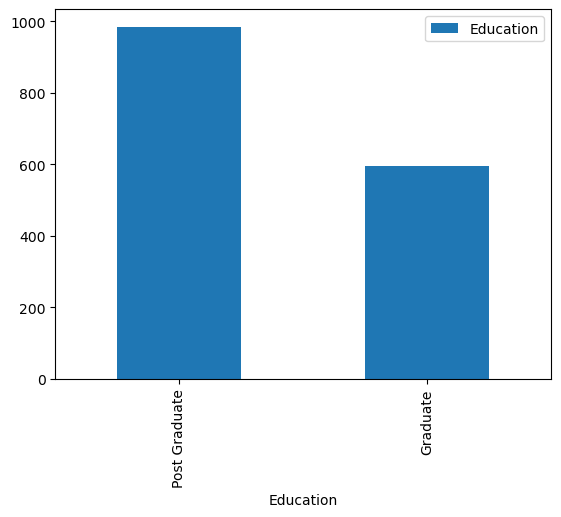

In [86]:
education_count.plot.bar()

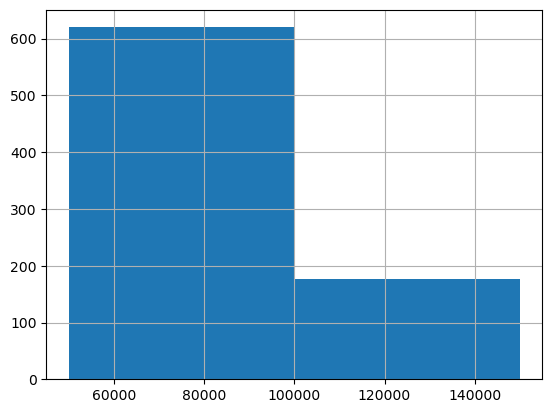

In [88]:
#Salary Distribution
salaried=car.where(car.Profession=="Salaried").dropna()
range=[50000,100000,150000]
plt.hist(salaried.Total_salary,range)
plt.grid()
plt.show()

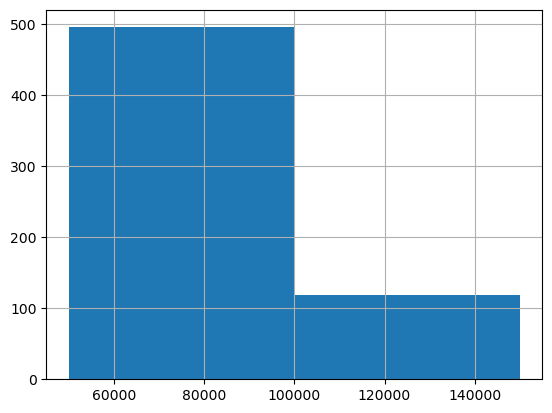

In [90]:
#Business salary distribution 
business=car.where(car.Profession=="Business").dropna()
range=[50000,100000,150000]
plt.hist(business.Total_salary,range)
plt.grid()
plt.show()

##### Data Analysis

In [93]:
car.groupby(["Gender","Make"])['Make'].count() # To count make by gender 

Gender  Make     
Female  Hatchback     15
        SUV          173
        Sedan        141
Male    Hatchback    567
        SUV          124
        Sedan        561
Name: Make, dtype: int64

In [95]:
car.groupby(["Make"])['Gender'].count()

Make
Hatchback    582
SUV          297
Sedan        702
Name: Gender, dtype: int64

In [97]:
Male=car.where(car.Gender=="Male").dropna() # To get only male data by removing female data and stored in new variable

In [99]:
Male

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53.0,Male,Business,Married,Post Graduate,4.0,No,No,Yes,99300.0,70700.0,170000.0,61000.0,SUV
4,53.0,Male,Salaried,Married,Post Graduate,3.0,No,No,Yes,79700.0,60200.0,139900.0,57000.0,SUV
7,52.0,Male,Salaried,Married,Graduate,4.0,No,No,Yes,79100.0,40400.0,119500.0,68000.0,SUV
8,52.0,Male,Salaried,Married,Post Graduate,4.0,No,No,No,89400.0,0.0,89400.0,61000.0,SUV
9,52.0,Male,Salaried,Married,Post Graduate,3.0,No,No,No,83700.0,0.0,83700.0,57000.0,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22.0,Male,Salaried,Single,Graduate,2.0,No,Yes,No,33300.0,0.0,33300.0,27000.0,Hatchback
1577,22.0,Male,Business,Married,Graduate,4.0,No,No,No,32000.0,0.0,32000.0,31000.0,Hatchback
1578,22.0,Male,Business,Single,Graduate,2.0,No,Yes,No,32900.0,0.0,32900.0,30000.0,Hatchback
1579,22.0,Male,Business,Married,Graduate,3.0,Yes,Yes,No,32200.0,0.0,32200.0,24000.0,Hatchback


In [101]:
Male=car.where(car.Gender=="Male")[["Gender","Make"]].dropna() # To get male data on the bases of make
Male

,Gender,Make
0,Male,SUV
4,Male,SUV
7,Male,SUV
8,Male,SUV
9,Male,SUV
...,...,...
1576,Male,Hatchback
1577,Male,Hatchback
1578,Male,Hatchback
1579,Male,Hatchback


In [103]:
Sample1=Male.sample(329).groupby("Make")["Make"].count() # To get sample of 329 male on the bases of make and store in new variable
Sample1

Make
Hatchback    136
SUV           36
Sedan        157
Name: Make, dtype: int64

In [105]:
Sample2=Male.sample(329).groupby("Make")["Make"].count() # To get sample of 329 male on the bases of make and store in new variable
Sample2

Make
Hatchback    151
SUV           37
Sedan        141
Name: Make, dtype: int64

In [107]:
Sample3=Male.sample(329).groupby("Make")["Make"].count() # To get sample of 329 male on the bases of make and store in new variable
Sample3

Make
Hatchback    150
SUV           23
Sedan        156
Name: Make, dtype: int64

In [109]:
female=car.where(car.Gender=="Female")[["Gender","Make"]].dropna() # To get female data on the bases of make
female

,Gender,Make
1,Female,SUV
2,Female,SUV
3,Female,SUV
5,Female,SUV
6,Female,SUV
...,...,...
1350,Female,Hatchback
1389,Female,Hatchback
1503,Female,Hatchback
1518,Female,Hatchback


In [111]:
fem=female.groupby('Make')['Make'].count() # To get female data on the bases of make and store in new variable
fem

Make
Hatchback     15
SUV          173
Sedan        141
Name: Make, dtype: int64

In [113]:
Sample1

Make
Hatchback    136
SUV           36
Sedan        157
Name: Make, dtype: int64

In [115]:
# Answer 1 : Disagree with the steve roger:
# According to the analysis female are more interested in SUV 
# Male candidates are more interested in Hatchback
# Both have almost similar interest in Sedan

In [117]:
Sample1=pd.DataFrame(Male.sample(329).groupby("Make")["Make"].count()).rename(columns={"Make":"Male"}) 
# To plot graph we need to convert Samples into Data Frame

In [119]:
Sample2=pd.DataFrame(Male.sample(329).groupby("Make")["Make"].count()).rename(columns={"Make":"Male"}) 
# To plot graph we need to convert Samples into Data Frame

In [121]:
Sample3=pd.DataFrame(Male.sample(329).groupby("Make")["Make"].count()).rename(columns={"Make":"Male"}) 
# To plot graph we need to convert Samples into Data Frame

In [123]:
fem=pd.DataFrame(female.groupby('Make')['Make'].count()).rename(columns={"Make":"Female"})
# To plot graph we need to convert Samples into Data Frame

In [125]:
MaleHB=[Sample1.iloc[0][0],Sample2.iloc[0][0],Sample3.iloc[0][0]]

In [127]:
FemaleHB=[fem.iloc[0][0],fem.iloc[0][0],fem.iloc[0][0]]

In [129]:
HB=pd.DataFrame({"Male":MaleHB,"Female":FemaleHB},index=["Samp1","Samp2","Samp3"])

<Axes: >

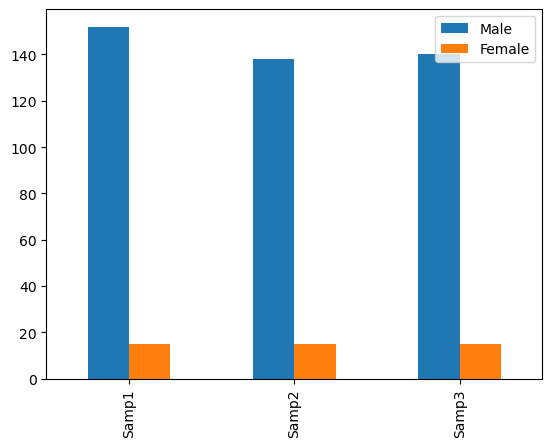

In [131]:
HB.plot.bar()

In [132]:
MaleSUV=[Sample1.iloc[1][0],Sample2.iloc[1][0],Sample3.iloc[1][0]]

In [135]:
FemaleSUV=[fem.iloc[1][0],fem.iloc[1][0],fem.iloc[1][0]]

In [137]:
SUV=pd.DataFrame({"Male":MaleSUV,"Female":FemaleSUV},index=["Samp1","Samp2","Samp3"])

<Axes: >

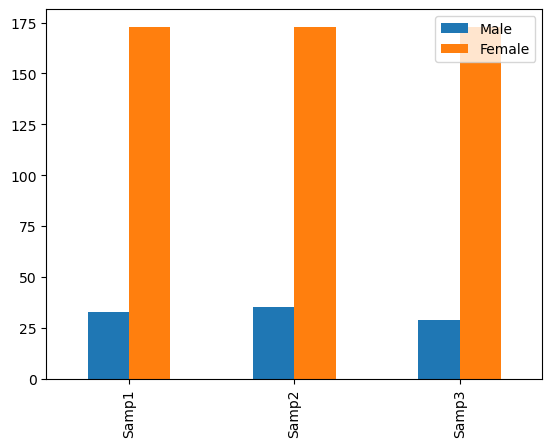

In [139]:
SUV.plot.bar()

In [140]:
MaleSN=[Sample1.iloc[2][0],Sample2.iloc[2][0],Sample3.iloc[2][0]]

In [143]:
FemaleSN=[fem.iloc[2][0],fem.iloc[2][0],fem.iloc[2][0]]

In [145]:
SN=pd.DataFrame({"Male":MaleSN,"Female":FemaleSN},index=["Samp1","Samp2","Samp3"])

<Axes: >

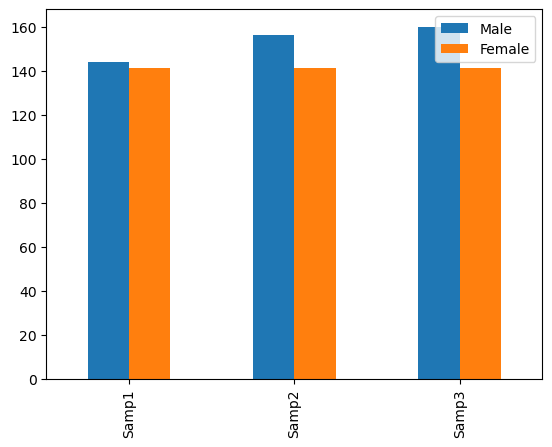

In [147]:
SN.plot.bar()

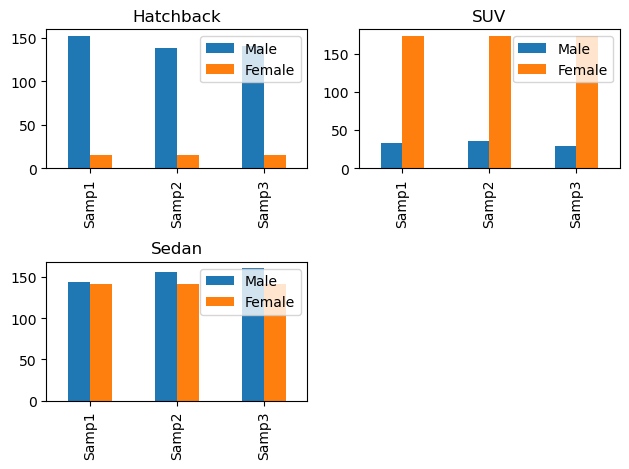

In [148]:
plt.subplot(2, 2, 1)
HB.plot.bar(ax=plt.gca())  #### Fix: direct the plot to the current subplot(ax=plt.gca())
plt.title('Hatchback')
plt.subplot(2, 2, 2)
SUV.plot.bar(ax=plt.gca())
plt.title('SUV')
plt.subplot(2, 2, 3)
SN.plot.bar(ax=plt.gca())
plt.title('Sedan')
plt.tight_layout()            ### used inthe end to avoid overlapping labels.

In [150]:
car['Profession'].value_counts() # Take value counts from profession 

Profession
Salaried    896
Business    685
Name: count, dtype: int64

In [151]:
salaried=car[car.Profession=="Salaried"][['Profession','Make']] # To count salaried person by profession and make

In [152]:
business=car[car.Profession=="Business"][['Profession','Make']]  #To count business person by profession and make

In [157]:
Salaried_Sample=salaried.sample(685).groupby("Make")["Make"].count() # To take sample from Profession (Salaried)

In [159]:
Business_Sam=business.groupby('Make')['Make'].count()

In [161]:
Sal_Sam=pd.DataFrame(salaried.sample(685).groupby("Make")["Make"].count()).rename(columns={"Make":"salaried"}) 

In [163]:
Sal_Sam

,salaried
Make,
Hatchback,223
SUV,164
Sedan,298


In [165]:
Bus_Sam=pd.DataFrame(business.groupby("Make")["Make"].count()).rename(columns={"Make":"Business"}) 

In [167]:
Bus_Sam

,Business
Make,
Hatchback,290
SUV,89
Sedan,306


In [169]:
Pro_Sal=[Sal_Sam.iloc[0][0]]

In [171]:
Pro_Bus=[Bus_Sam.iloc[0][0]]

<Axes: >

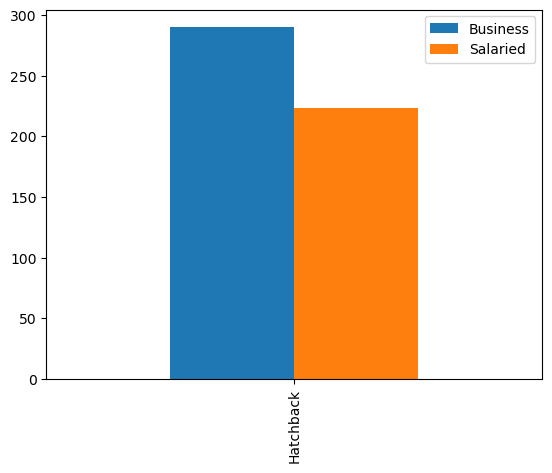

In [173]:
pd.DataFrame({"Business":Pro_Bus,"Salaried":Pro_Sal},index=["Hatchback"]).plot.bar()

In [175]:
Pro_Sal=[Sal_Sam.iloc[1][0]]

In [177]:
Pro_Bus=[Bus_Sam.iloc[1][0]]

<Axes: >

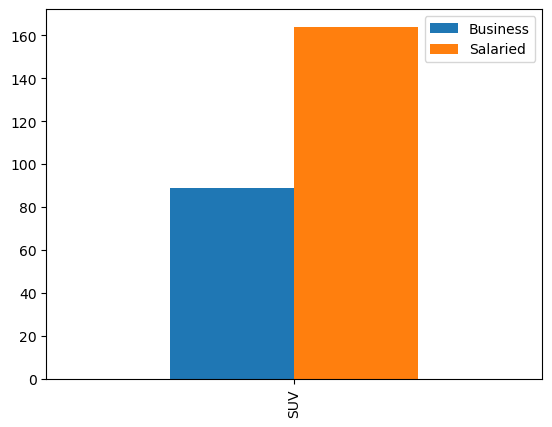

In [179]:
pd.DataFrame({"Business":Pro_Bus,"Salaried":Pro_Sal},index=["SUV"]).plot.bar()

In [181]:
Pro_Sal=[Sal_Sam.iloc[2][0]]

In [183]:
Pro_Bus=[Bus_Sam.iloc[2][0]]

<Axes: >

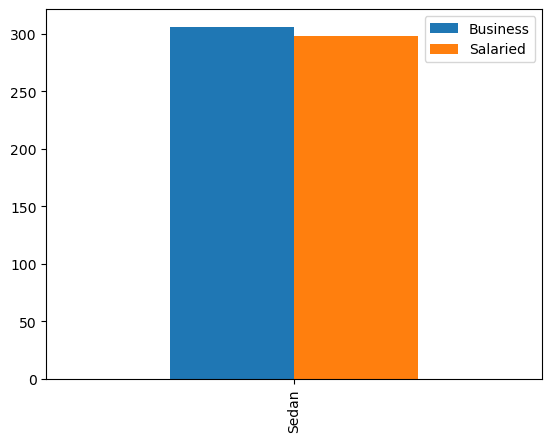

In [185]:
pd.DataFrame({"Business":Pro_Bus,"Salaried":Pro_Sal},index=["Sedan"]).plot.bar()

In [187]:
# Answer 2: Agree with Ned Stark as per analysis
# Business person are more interested in hatchback
# Salaried person are more interested in SUV
# Both have almost similar interest in Sedan

In [189]:
car['Marital_status'].value_counts()

Marital_status
Married    1443
Single      138
Name: count, dtype: int64

In [260]:
married=car[car.Marital_status=="Married"][['Marital_status','Make']]

In [262]:
single=car[car.Marital_status=="Single"][['Marital_status','Make']]

In [264]:
married_sam1=married.sample(138).groupby("Make")["Make"].count()

In [266]:
married_sam2=married.sample(138).groupby("Make")["Make"].count()

In [268]:
married_sam3=married.sample(138).groupby("Make")["Make"].count()

In [270]:
single_sam=single.groupby('Make')['Make'].count()

In [272]:
M1=pd.DataFrame(married.sample(138).groupby("Make")["Make"].count()).rename(columns={"Make":"Married"}) 
M1

,Married
Make,
Hatchback,46
SUV,22
Sedan,70


In [274]:
M2=pd.DataFrame(married.sample(138).groupby("Make")["Make"].count()).rename(columns={"Make":"Married"}) 
M2

,Married
Make,
Hatchback,44
SUV,36
Sedan,58


In [276]:
M3=pd.DataFrame(married.sample(138).groupby("Make")["Make"].count()).rename(columns={"Make":"Married"}) 
M3

,Married
Make,
Hatchback,54
SUV,25
Sedan,59


In [278]:
S_S=pd.DataFrame(single.groupby('Make')['Make'].count()).rename(columns={"Make":"Single"})

In [280]:
S_S

,Single
Make,
Hatchback,84
SUV,16
Sedan,38


In [282]:
Married_HB=[M1.iloc[0][0],M2.iloc[0][0],M3.iloc[0][0]]

In [284]:
Single_HB=[S_S.iloc[0][0],S_S.iloc[0][0],S_S.iloc[0][0]]

In [286]:
HB1=pd.DataFrame({"married":Married_HB,"single":Single_HB},index=["Samp1","Samp2","Samp3"])

<Axes: >

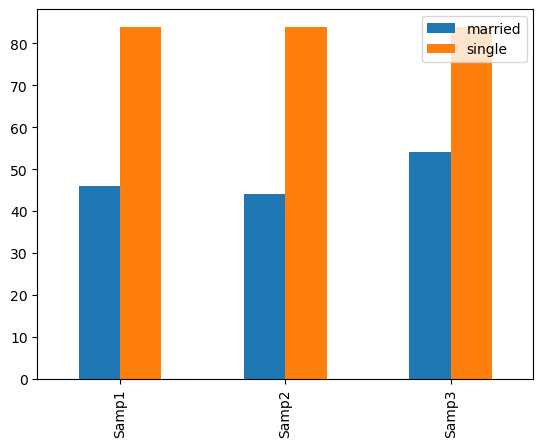

In [288]:
HB1.plot.bar()

In [290]:
Married_SUV=[M1.iloc[1][0],M2.iloc[1][0],M3.iloc[1][0]]

In [292]:
Single_SUV=[S_S.iloc[1][0],S_S.iloc[1][0],S_S.iloc[1][0]]

In [294]:
SUV1=pd.DataFrame({"married":Married_SUV,"single":Single_SUV},index=["Samp1","Samp2","Samp3"])

<Axes: >

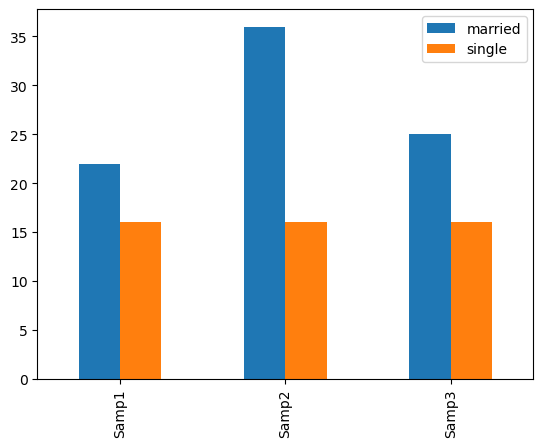

In [296]:
SUV1.plot.bar()

In [298]:
Married_SD=[M1.iloc[2][0],M2.iloc[2][0],M3.iloc[2][0]]

In [300]:
Single_SD=[S_S.iloc[2][0],S_S.iloc[2][0],S_S.iloc[2][0]]

In [302]:
SD1=pd.DataFrame({"married":Married_SD,"single":Single_SD},index=["Samp1","Samp2","Samp3"])

<Axes: >

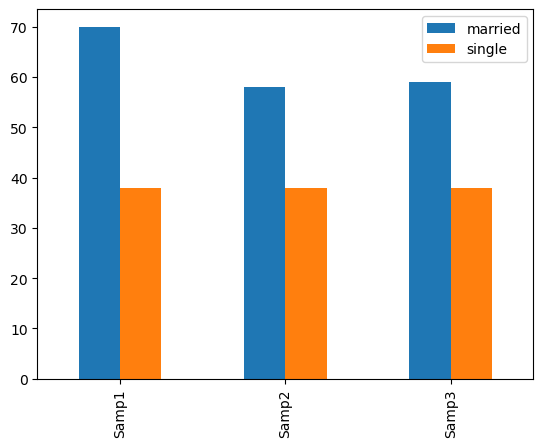

In [304]:
SD1.plot.bar()